In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

# Define model
> $b_1, b_2 \sim N(0,1)$, independent. $x_1 = b_1 + 2b_2 + 3$, $x_2 = 2b_1 - 2b_2 + 10$. Find the first principal component of $\mathbf{x}=(x_1, x_2)$.  
> * Analytical solution:
>  > Let $\mathbf{d} = (d_1, d_2)$ be the direction along which the projection of $\mathbf{x}$ has the largest variance. Assume $\|\mathbf{d}\| = 1$, then the length of the projection of $\mathbf{x}$ onto $\mathbf{d}$ is $\mathbf{d}^T \mathbf{x}$. Thus, we try to find a unit vector $\mathbf{d}$ to maximize $Var(d_1x_1 + d_2x_2)$. Since $Var(d_1 x_1 + d_2 x_2) = (d_1+2d_2)^2 + (2d_1 - 2d_2)^2 = 5d_1^2 + 8d_2^2 - 4d_1d_2 = 9(d_1^2 + d_2^2) - (d_2+2d_1)^2 \leq 9$, we conclude that the first principal component $\mathbf{d}$ of $\mathbf{x}$ is $\mathbf{d} = (\frac{1}{\sqrt{5}}, -\frac{2}{\sqrt{5}}) \approx (0.4472, -0.8944)$.

In [5]:
b1 = np.random.normal(0,1,size=10000)
b2 = np.random.normal(0,1,size=10000)
epsilon = np.random.normal(0,1,size=10000)

In [6]:
x1 = b1+2*b2+5
x2 = 2*b1-2*b2+10

In [17]:
df_new = pd.DataFrame(np.array([x1,x2]).T,columns=['x1','x2'])

In [8]:
X = np.array(df_new[['x1','x2']])
y = np.array(df_new['y'])

# Train model and compare with analytical solution

In [15]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_, pca.explained_variance_)

[[ 0.42467173 -0.9053474 ]
 [ 0.9053474   0.42467173]] [9.17469052 3.95447377]


(-4.077484433720397,
 13.606983164620493,
 -3.0732855551909712,
 22.083888705762977)

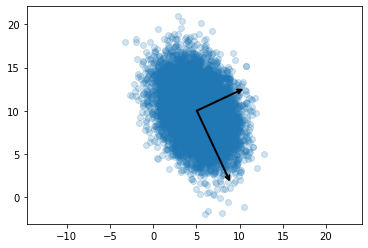

In [16]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
ax = plt.gca()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)
plt.axis('equal')

In [31]:
pca.components_[0]

array([ 0.42467173, -0.9053474 ])

In [32]:
X

array([[ 1.00753562, 11.06868787],
       [ 2.41422498,  9.71135209],
       [ 8.29447627,  7.80341851],
       ...,
       [ 7.2229793 ,  8.20951835],
       [ 8.12353505,  9.65330561],
       [ 3.1528228 , 15.28560913]])

In [37]:
np.dot(X,pca.components_[0]) - np.dot(X,pca.components_[0]).mean()

array([-2.67471687, -0.84847524,  3.37604398, ...,  2.55334806,
        1.6286596 , -5.58145275])

In [38]:
pca.transform(X).T

array([[-2.67471687, -0.84847524,  3.37604398, ...,  2.55334806,
         1.6286596 , -5.58145275],
       [-3.21113278, -2.51401237,  1.9994124 , ...,  1.20179453,
         2.63024597,  0.52190466]])

In [18]:
df_new['y'] = df_new.eval('x1-2*x2-2') + epsilon*1

In [19]:
df_new

,x1,x2,y
0,1.007536,11.068688,-21.250264
1,2.414225,9.711352,-19.427503
2,8.294476,7.803419,-8.998080
3,3.286225,13.680833,-26.351131
4,4.852039,9.205300,-15.435275
...,...,...,...
9995,6.898842,5.842795,-7.445846
9996,1.133492,11.653230,-22.905424
9997,7.222979,8.209518,-12.176032
9998,8.123535,9.653306,-12.390335
